# Importing Libraries

In [172]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [173]:
df = pd.read_csv('../datasets/Barcamp Bangkhen 2023 Participant Registration (Responses) - Form Responses 1.csv')

# Data Cleaning & EDA 

In [174]:
df.columns

Index(['Timestamp', 'Email Address', 'ชื่อจริง (Firstname)',
       'นามสกุล (Lastname)', 'อาชีพ (Career)',
       'องค์กรที่สังกัด (Organization)',
       'ประวัติการแพ้อาหาร และอาหารตามความเชื่อหรือศาสนา (Food allergy/religious or ethical preferences)',
       'Size เสื้อโดยประมาณ (Approximate  Shirt Size )\n**เฉพาะผู้ที่ลงทะเบียน 200 คนแรก(จำนวนอาจมีการเปลี่ยนแปลง) จะได้รับเสื้อยืด T-shirt Barcamp Bangkhen 2023\n**Only the first 200 registrants(The amount may change) will receive a free Barcamp Bangkhen 2023 T-shirt.',
       'ความสนใจ (Interests) (comma-serperated)',
       'ความยินยอมในการใช้ข้อมูล (Consent for the use of information)'],
      dtype='object')

In [175]:
df = df.drop(columns=['Email Address', 'ชื่อจริง (Firstname)', 'นามสกุล (Lastname)'])

In [176]:
df.rename(index=str, 
             columns={  'อาชีพ (Career)': "career", 'องค์กรที่สังกัด (Organization)': "organization", 
                        'ประวัติการแพ้อาหาร และอาหารตามความเชื่อหรือศาสนา (Food allergy/religious or ethical preferences)' : "food", 
                        "Size เสื้อโดยประมาณ (Approximate  Shirt Size )\n**เฉพาะผู้ที่ลงทะเบียน 200 คนแรก(จำนวนอาจมีการเปลี่ยนแปลง) จะได้รับเสื้อยืด T-shirt Barcamp Bangkhen 2023\n**Only the first 200 registrants(The amount may change) will receive a free Barcamp Bangkhen 2023 T-shirt.": "size", 
                        'ความสนใจ (Interests) (comma-serperated)': "interest", 
                        'ความยินยอมในการใช้ข้อมูล (Consent for the use of information)': "consent" }, inplace=True)

In [177]:
df.head()

,Timestamp,career,organization,food,size,interest,consent
0,1/16/2023 19:29:00,เจ้าหน้าที่ของรัฐ,NaN,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"Banking, Cloud Computing, Coding, Computer, Ed...",ยินยอม (Consent)
1,1/16/2023 19:30:03,Software Engineer,Witsawa Corporation,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,L,"AI, Banking, Big Data, Blockchain, Cloud Compu...",ยินยอม (Consent)
2,1/16/2023 19:30:55,Developer,-,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"AI, Blockchain, Cooking, Cyber Security, Food,...",ยินยอม (Consent)
3,1/16/2023 19:38:45,นักศึกษาปริญญาโท,จุฬาลงกรณ์มหาวิทยาลัย,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,L,"AI, Anime, Augmented Reality, Banking, Big Dat...",ยินยอม (Consent)
4,1/16/2023 19:39:38,-,NaN,ไม่แพ้อาหารหรือความต้องการด้านอาหารอื่นๆ (Neit...,XL,"Banking, Cooking",ยินยอม (Consent)


**Interests**

In [178]:
df['interest'].head()

0    Banking, Cloud Computing, Coding, Computer, Ed...
1    AI, Banking, Big Data, Blockchain, Cloud Compu...
2    AI, Blockchain, Cooking, Cyber Security, Food,...
3    AI, Anime, Augmented Reality, Banking, Big Dat...
4                                     Banking, Cooking
Name: interest, dtype: object

In [179]:
interest_dummy = df['interest'].copy()
interest_dummy = interest_dummy.str.strip()
interest_dummy = interest_dummy.str.replace(' ,', ',', regex=True)
interest_dummy = interest_dummy.str.replace(', ', ',', regex=True)

interest_dummy = pd.concat([interest_dummy.str.get_dummies(sep=",")])
interest_dummy.head()

,-,...,AI,API services,AR,ASMR,Ads Technology,Agile,Andriod,Android,...,เทคโนโลยี,เทคโนโลยี การเงิน การขนส่ง,เทคโนโลยี เศรษฐกิจ การเมือง,เพลง,เรื่องที่ไ่ม่เคยรู้มาก่อน,เรื่องผี,เรื่องผี สังคม ประเทศ,เรื่องเทคโนโลยีอะไรก็ได้,แนะแนวการเรียนต่อ,แน้วโน้มการจ้างงาน
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
interest_dummy = interest_dummy.drop(interest_dummy.columns[[0,1]],axis = 1)
interest_dummy.head()

,AI,API services,AR,ASMR,Ads Technology,Agile,Andriod,Android,Anime,Apple Inc.,...,เทคโนโลยี,เทคโนโลยี การเงิน การขนส่ง,เทคโนโลยี เศรษฐกิจ การเมือง,เพลง,เรื่องที่ไ่ม่เคยรู้มาก่อน,เรื่องผี,เรื่องผี สังคม ประเทศ,เรื่องเทคโนโลยีอะไรก็ได้,แนะแนวการเรียนต่อ,แน้วโน้มการจ้างงาน
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
interest_count = interest_dummy.sum(axis=0).sort_values(ascending=False)
df_interest_count = interest_count.to_frame().reset_index()
df_interest_count

,index,0
0,AI,52
1,Computer,41
2,Technology,39
3,Coding,39
4,Big Data,32
...,...,...
262,Tech,1
263,Tech Leader,1
264,Tech Trend,1
265,API services,1


Text(0, 0.5, 'Topics')

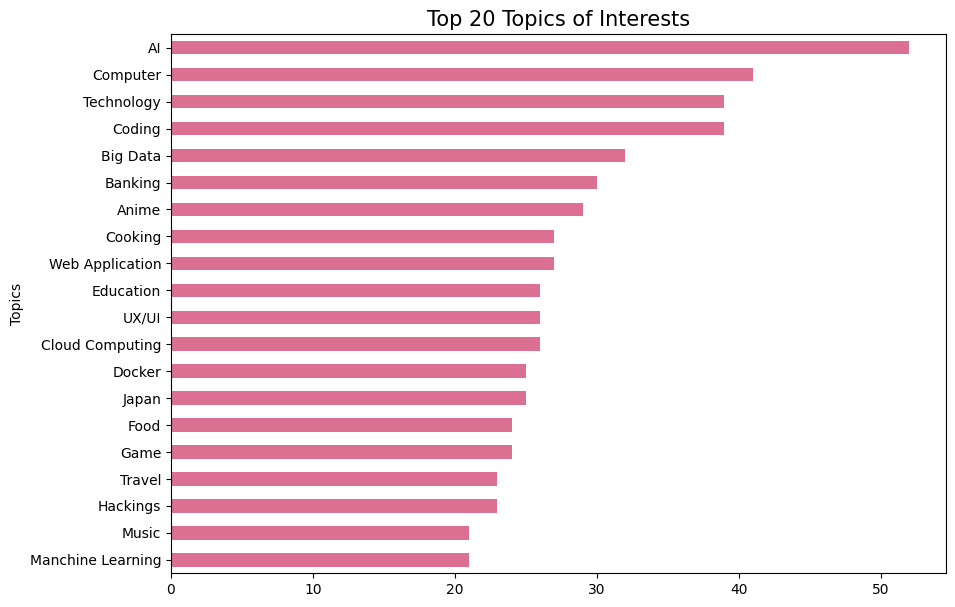

In [182]:
plt.figure(figsize=(10,7))
interest_count[:20].plot(kind='barh', color='palevioletred')
plt.gca().invert_yaxis()
plt.title('Top 20 Topics of Interests', fontsize=15)
plt.ylabel('Topics')

**Organization**

In [183]:
df_org = df['organization'].copy()
df_org

0                        NaN
1        Witsawa Corporation
2                          -
3      จุฬาลงกรณ์มหาวิทยาลัย
4                        NaN
               ...          
192                   VISTEC
193                      NaN
194                      Ntt
195                      NaN
196                        -
Name: organization, Length: 197, dtype: object

In [184]:
df_org.isna().sum()

72

In [185]:
df_org = df_org.fillna('None')
df_org = df_org.str.replace('-', 'None').replace('(None)', 'None').replace('ไม่มี', 'None')

df_org = df_org.str.replace('มหาวิทยาลัยเกษศาสตร์', 'มหาวิทยาลัยเกษตรศาสตร์').replace('มหาวิทยาลัยเกษตรศาสตร์บางเขน', 'มหาวิทยาลัยเกษตรศาสตร์').replace('เกษตรศาตร์ บางเขน', 'มหาวิทยาลัยเกษตรศาสตร์')
df_org = df_org.str.replace('ม.เกษตรศาสตร์', 'มหาวิทยาลัยเกษตรศาสตร์').replace('เกษตรศาสตร์', 'มหาวิทยาลัยเกษตรศาสตร์').replace('KU', 'มหาวิทยาลัยเกษตรศาสตร์')
df_org = df_org.str.replace('มหาวิทยาเกษตรศาสตร์', 'มหาวิทยาลัยเกษตรศาสตร์').replace('มหาวิทยาลยเกษตรศาสตร์', 'มหาวิทยาลัยเกษตรศาสตร์').replace('Kasetsart university', 'มหาวิทยาลัยเกษตรศาสตร์')
df_org = df_org.str.replace('มอเกษตร บางเขน', 'มหาวิทยาลัยเกษตรศาสตร์').replace('Ku', 'มหาวิทยาลัยเกษตรศาสตร์')

df_org = df_org.str.replace('Chulalongkorn University ', 'จุฬาลงกรณ์มหาวิทยาลัย')

df_org = df_org.str.replace('LINEMAN Wongnai', 'LINE MAN Wongnai').replace('Lineman Wongnai', 'LINE MAN Wongnai').replace('LMWN', 'LINE MAN Wongnai')

df_org = df_org.str.replace('baac', 'BAAC')

df_org = df_org.str.replace('mfec', 'MFEC').replace('MFEC PCL', 'MFEC')

df_org = df_org.str.replace('SCB10x', 'SCB10X')



In [186]:
df_org.value_counts()[:15]

None                                86
มหาวิทยาลัยเกษตรศาสตร์              31
LINE MAN Wongnai                     7
จุฬาลงกรณ์มหาวิทยาลัย                3
BAAC                                 3
MFEC                                 3
Apppi                                2
SCB10X                               2
KMUTT                                2
EGAT                                 2
VISTEC                               2
Thoughtworks                         2
โรงเรียนสารสาสน์วิเทศสมุทรปราการ     1
Bioice                               1
LSEG                                 1
Name: organization, dtype: int64

In [187]:
df_org.unique()

array(['None', 'Witsawa Corporation', 'จุฬาลงกรณ์มหาวิทยาลัย',
       'D.E. Wellington Technologies Co., Ltd., Merkle Capital (Cryptomind Group), null',
       'Thoughtworks', 'BAAC', 'Rush to refine', 'MFEC',
       'LINE MAN Wongnai', 'Earnin', 'ฟรีแลนซ์', 'ATANoneIT', 'Siampiwat',
       'มหาวิทยาลัยเกษตรศาสตร์', 'Viila technologies',
       'Siam Compressor Industry ', 'Agoda', 'Krungsri AYCAP',
       'Bank of ayudhya', 'Ascend', 'KBTG', 'EGAT', 'Socket9 ', 'nmth',
       'BLA & Finnomena', 'Wisesight', 'AIS', 'AWN', 'SCB10X', 'KMUTT',
       'Ascend Group', 'โรงพยาบาลมหาราชนครเชียงใหม่', 'SCB TechX ',
       'VISTEC', 'ascens', 'Redhat', 'สำนักงาน กสทช.',
       'True Digital Group', 'Wind training ', 'บมจ. หลักทรัพย์กสิกรไทย',
       'LSEG', 'Apppi', 'Double P Entreprise', 'Bioice',
       'โรงเรียนบ้านนา นายกพิทยากร', 'Chonkanyanukoon',
       'โรงเรียนเทพศิรินทร์ นนทบุรี', 'True Voice',
       'โรวเรียน สายปัญญารังสิต', 'โรงเรียนสารสาสน์วิเทศสมุทรปราการ',
       'ByteArk', 'บร

**Career**

In [188]:
df_cr = df['career'].copy()
df_cr

0       เจ้าหน้าที่ของรัฐ
1      Software Engineer 
2              Developer 
3        นักศึกษาปริญญาโท
4                       -
              ...        
192           PhD Student
193                   NaN
194                 Scrum
195                   NaN
196             Developer
Name: career, Length: 197, dtype: object

In [189]:
df_cr = df_cr.fillna('None')
df_cr = df_cr.str.replace('-', 'None')
df_cr = df_cr.str.replace('นิสิต', 'นักศึกษา').replace('นิสิต/นักศึกษา', 'นักศึกษา').replace('นักศึกษา/นักศึกษา', 'นักศึกษา')

df_cr = df_cr.str.replace('Student', 'นักเรียน').replace('นักเรียนs ', 'นักเรียน')

df_cr = df_cr.str.replace('Software Engineer ', 'Software Engineer').replace('Software engineer ', 'Software Engineer').replace('Software engineer', 'Software Engineer')

df_cr = df_cr.str.replace('โปรแกรมเมอร์', 'Programmer')

df_cr = df_cr.str.replace('Developers', 'Developer').replace('Dev', 'Developer').replace('developer', 'Developer')

df_cr = df_cr.str.replace('it', 'IT').replace('It', 'IT')

df_cr = df_cr.str.replace('รับจ้างอิสระ', 'Freelancer').replace('รับจ้าง', 'Freelancer').replace('freelance', 'Freelancer')

df_cr = df_cr.str.replace('PM', 'Project Manager')


In [190]:
df_cr.value_counts()[:18]

None                         40
นักศึกษา                     36
นักเรียน                     21
Software Engineer            16
Programmer                    8
Software Developer            7
Developer                     7
Freelancer                    4
IT                            3
พนักงานบริษัท                 3
SITe ReliabilITy Engineer     2
Engineer                      2
Project Manager               2
ว่างงาน                       2
อาจารย์                       2
ข้าราชการ                     1
Technology Evangelist         1
Researcher                    1
Name: career, dtype: int64

In [191]:
df_cr.unique()

array(['เจ้าหน้าที่ของรัฐ', 'Software Engineer', 'Developer ',
       'นักศึกษาปริญญาโท', 'None', 'นักศึกษา', 'เกษตรกร',
       'CEO, FullNonestack Developer, Freelancer', 'Graduate นักเรียน ',
       'Software Developer', 'IT Consultant', 'System engineer',
       'System admin', 'Programmer', 'Software ArchITect', 'นักเรียน',
       'Entrepreneur', 'Procrastinator', 'Marketing online',
       'Reseacher/Teacher/Coach', 'SecurITy Engineer', 'HR', 'Junior dec',
       'Developer', 'Project Manager', 'BI Developer',
       'SITe ReliabilITy Engineer', 'IT', 'รัฐวิสาหกิจ',
       'Financial advisor', 'Freelancer', 'Engineer', 'Data Engineer',
       'SRE', 'อาจารย์', 'ว่างงาน', 'NEET', 'แพทย์',
       'Technology Evangelist ', 'Researcher', 'Consultant', 'ข้าราชการ',
       'พนักงานบริษัท', 'HR Business Partner', 'EquITy Wealth Manager',
       'Frontend Deverloper', 'UX/UI Designer',
       'Software QualITy Assurance', 'Head of Engineering', 'นักธุรกิจ',
       'LowNonecode dev', 'Mark

**Shirt Size**

In [192]:
df_size = df['size'].copy()
df_size

0      XL
1       L
2      XL
3       L
4      XL
       ..
192    XL
193     S
194    XS
195     M
196     M
Name: size, Length: 197, dtype: object

In [193]:
df_size = df_size.str.replace('XXXL', '3XL').replace('3 xl', '3XL').replace('3XL (อก 48)', '3XL').replace('รอบ อก 50 นิ้ว ', '3XL')

In [194]:
df_size.value_counts()

L      73
XL     50
M      28
XXL    24
S      11
3XL     9
XS      2
Name: size, dtype: int64

Text(0, 0.5, 'Size')

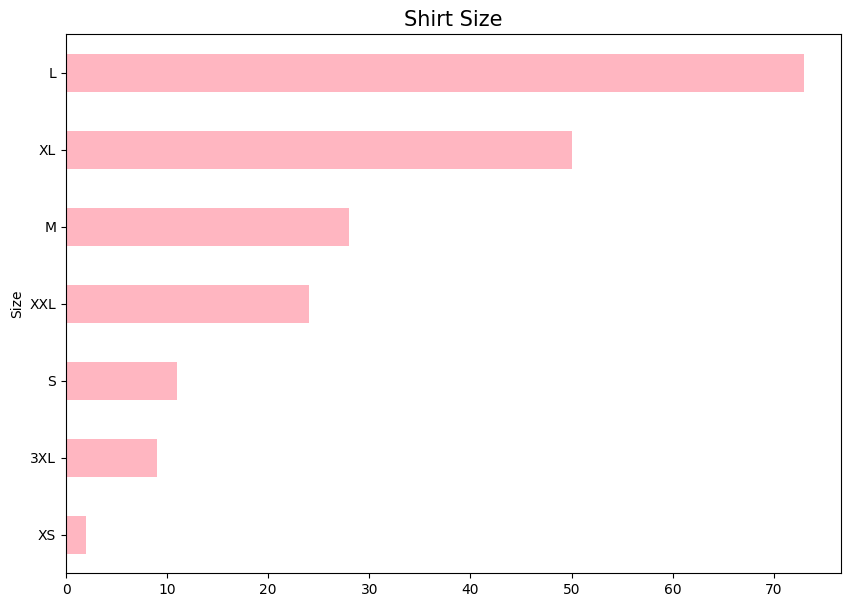

In [195]:
plt.figure(figsize=(10,7))
df_size.value_counts().plot(kind='barh', color='lightpink')
plt.gca().invert_yaxis()
plt.title('Shirt Size', fontsize=15)
plt.ylabel('Size')

# Save clean data to CSV

In [196]:
# df_interest_count.to_csv('interest-cleaned.csv', index=False)
# interest_dummy.to_csv('interest-dummy.csv', index=False)